In [1]:
import torch
import torch.nn as nn

In [2]:
# Define the dimensions for input tensor
N, C, H, W = 20, 5, 10, 10

# Create a random tensor as input
input = torch.randn(N, C, H, W)

# Apply Layer Normalization
# LayerNorm: The length of each dimension that is going to be normalised has to be written down as a list in first argument
layer_norm = nn.LayerNorm([C, H, W])
layer_norm_output = layer_norm(input)

# Apply Group Normalization
# GroupNorm: num_groups is first argument, second argument length of channel dimension. Subsequent spatial dimensions are all included in
# normalisation
group_norm = nn.GroupNorm(1, 5)
output_group_norm = group_norm(input)

# Check if outputs from LayerNorm and GroupNorm are identical
(output_group_norm == layer_norm_output).all()

tensor(False)

In [17]:
# Define the dimensions for input tensor
N, C, H, W = 20, 5, 10, 10

# Create a random tensor as input
input = torch.randn(N, C, H, W)

# Apply Layer Normalization
# LayerNorm: The length of each dimension that is going to be normalised has to be written down as a list in first argument
layer_norm = nn.LayerNorm([C, H, W])
layer_norm_output = layer_norm(input)

# Apply Group Normalization
# GroupNorm: num_groups is first argument, second argument length of channel dimension. Subsequent spatial dimensions are all included in
# normalisation
group_norm = nn.GroupNorm(1, 5, affine=False)
output_group_norm = group_norm(input)

# Check if outputs from LayerNorm and GroupNorm are identical
(output_group_norm == layer_norm_output).all()

tensor(False)

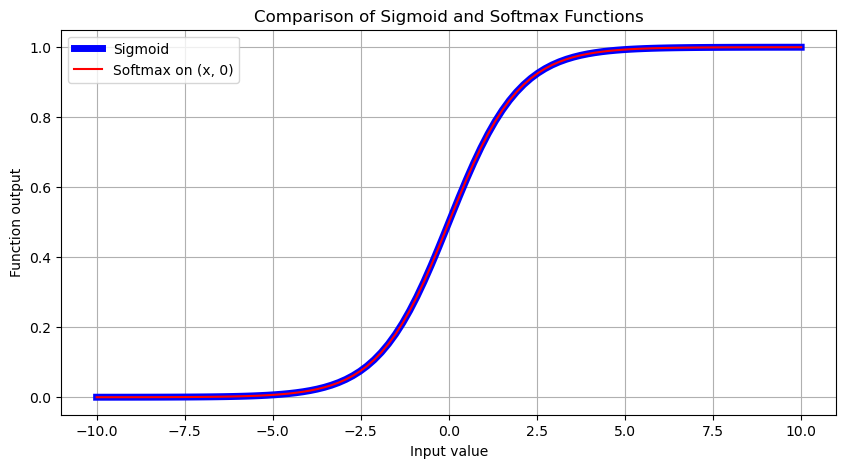

In [12]:
# Softmax and sigmoid are the same for Sigmoid array [x, 0]

import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the softmax function
def softmax(z):
    e_z = np.exp(z - np.max(z))  # Subtract max for numerical stability
    return e_z / e_z.sum()

# Generate a range of values for plotting
x_values = np.linspace(-10, 10, 100)
sigmoid_values = sigmoid(x_values)

# Prepare two inputs for softmax (for simplicity, we use one of them as zero)
z_values = np.array([0, 0])  # Starting point for softmax
softmax_values = [softmax(np.array([x, 0]))[0] for x in x_values]  # Compute softmax for each x paired with 0

# Plot both functions
plt.figure(figsize=(10, 5))
plt.plot(x_values, sigmoid_values, label='Sigmoid', color='blue', linewidth=5)
plt.plot(x_values, softmax_values, label='Softmax on (x, 0)', color='red')
plt.title('Comparison of Sigmoid and Softmax Functions')
plt.xlabel('Input value')
plt.ylabel('Function output')
plt.legend()
plt.grid(True)
plt.show()
